
K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into a predetermined number of clusters. The goal of K-means clustering is to group similar data points together and minimize the within-cluster variance.

The algorithm works as follows:

Initialization: Choose the number of clusters (K) and randomly initialize K cluster centroids. These centroids represent the initial cluster centers.

Assignment: Assign each data point to the nearest cluster centroid based on a distance metric, typically Euclidean distance. This step forms K clusters based on the initial centroids.

Update Centroids: Recalculate the centroids of the clusters by taking the mean of all data points assigned to each cluster.

Repeat: Repeat steps 2 and 3 until convergence, which occurs when the centroids no longer change significantly or a maximum number of iterations is reached.

K-means clustering aims to minimize the within-cluster variance, which is the sum of squared distances between each data point and its assigned cluster centroid. The algorithm iteratively assigns data points to clusters and updates centroids to minimize this objective function.

K-means clustering is sensitive to the initial choice of centroids and may converge to a local minimum depending on the initialization. To mitigate this issue, the algorithm is often run multiple times with different initializations, and the solution with the lowest within-cluster variance is selected.

K-means clustering is widely used for various applications, including customer segmentation, image compression, anomaly detection, and recommendation systems. It is computationally efficient and scalable, making it suitable for large datasets. However, it requires specifying the number of clusters beforehand, which can be challenging in practice. Additionally, K-means assumes clusters to be spherical and of similar size, which may not always hold true for complex datasets.

In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from pylab import *
import nltk
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns;
sns.set()
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [4]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words = stop_words + list(string.printable)
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
categories= ['misc.forsale', 'sci.electronics', 'talk.religion.misc']

In [7]:
news_data = fetch_20newsgroups(subset='train', categories=categories,shuffle=True, random_state=42, download_if_missing=True)

In [8]:
news_data_df = pd.DataFrame({'text' : news_data['data'], 'category': news_data.target})
news_data_df.head()

,text,category
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0


In [12]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
news_data_df['cleaned_text'] = news_data_df['text'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
  for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x))) if word.lower() not in stop_words]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
tfidf_model=TfidfVectorizer(max_features=200)
tfidf_df=pd.DataFrame(tfidf_model.fit_transform(news_data_df['cleaned_text']).todense())
tfidf_df.columns=sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,00,10,100,12,14,15,16,20,25,30,...,well,wire,wiring,without,word,work,world,would,writes,year
0,0.435655,0.0,0.000000,0.0,0.000000,0.127775,0.136811,0.127551,0.133311,0.0,...,0.0,0.0,0.0,0.0,0.0,0.113042,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.294937,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.142267,0.106317,0.100306,0.0
4,0.000000,0.0,0.207003,0.0,0.191897,0.182138,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


We will use the KMeans function of sklearn to create 4 clusters from a tf-idf represernation of news articles

In [15]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tfidf_df)
y_kmeans = kmeans.predict(tfidf_df)
news_data_df['obtained_clusters'] = y_kmeans

1. `kmeans = KMeans(n_clusters=4)`: it will initialize the KMeans class with 4 clusters. In the context of the KMeans algorithm, a cluster refers to a collection of data points aggregated together because of certain similarities.

2. `kmeans.fit(tfidf_df)`: it will fit or train the KMeans model with the given data `tfidf_df`. The `tfidf_df` is a DataFrame which likely contains the term frequency-inverse document frequency (TF-IDF) representation of some text data. TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

3. `y_kmeans = kmeans.predict(tfidf_df)`: Once the model has been trained, it will assign each data point in `tfidf_df` to one of the 4 clusters. The result is stored in the `y_kmeans` variable. Each item in `y_kmeans` represents the predicted cluster number for the corresponding data point in `tfidf_df`.

4. `news_data_df['obtained_clusters'] = y_kmeans`: It will add a new column `obtained_clusters` to the DataFrame `news_data_df` and setting its value to the cluster numbers stored in `y_kmeans`.

In summary, the above code will break down some text data into 4 clusters based on the Term Frequency-Inverse Document Frequency and storing the result in `news_data_df['obtained_clusters']`.

We will use pandas' crosstab function to compare the clusters we have obtained with the actual categories of the news articles

In [16]:
pd.crosstab(news_data_df['category'].replace({0:'misc.forsale', 1:'sci.electronics', 2:'talk.religion.misc'}),\
            news_data_df['obtained_clusters'].replace({0 : 'cluster_1', 1 : 'cluster_2', 2 : 'cluster_3', 3: 'cluster_4'}))

obtained_clusters,cluster_1,cluster_2,cluster_3,cluster_4
category,,,,
misc.forsale,94,372,118,1
sci.electronics,434,9,148,0
talk.religion.misc,75,0,78,224


We need  to obtain the optimal value of k, that is, the number of clusters, we execute the k-means algorithm for values of k ranging from 1 to 6. For each value of k, we store the distortion, that is, the mean of distances of documents from their nearest cluster center. We look for the value of k where the slope of the plot changes rapidly.

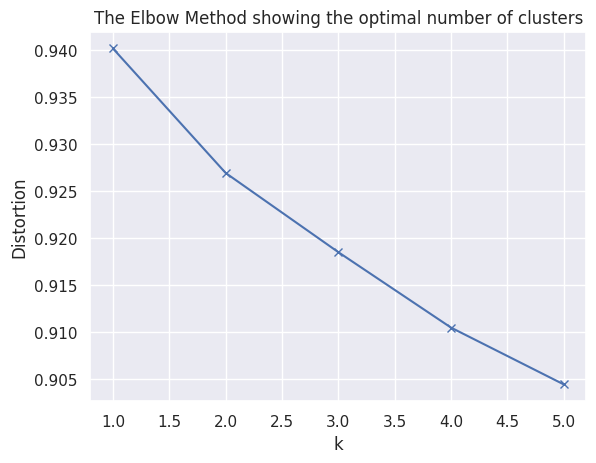

In [17]:
distortions = []
K = range(1,6)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(tfidf_df)
    distortions.append(sum(np.min(cdist(tfidf_df, kmeanModel.cluster_centers_, 'euclidean'), \
                                  axis=1)) / tfidf_df.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()

from the above result, we can conclude that the optinal number of cluster is 2

1. Initialising an empty list "distortions" and a range (1 to 6 exclusive) in "K"- These will be used to store the computed distortion values for respective 'k' values.

2. The 'for' loop goes through each value of 'k' (from 1 to 5). It will create a KMeans model with 'k' number of clusters and fit the KMeans model on the 'tfidf_df' dataframe (which presumably contains some text data represented as TF-IDF vectors). And then it will compute the Euclidean distance between each point in 'tfidf_df' and the nearest cluster center (computed from the KMeans model). The 'cdist' function from SciPy's spatial.distance library is used to compute these distances. - It then takes the minimum distance for each point and sums them all. This sum is divided by the number of points (tfidf_df.shape[0]), giving the average distortion for this value of 'k'. This average distortion is appended to the 'distortions' list.

3. Once the distortions are calculated for all k values, it plots 'K' (number of clusters) on the x-axis and 'distortions' on the y-axis. This plot helps visualise how the average distortion decreases as 'k' increases, allowing one to choose the optimal 'k' where the rate of decrease sharply shifts (the "elbow" point).

4. The plot's x-axis is labeled as 'k', the y-axis is labeled as 'Distortion' and the title of the plot is 'The Elbow Method showing the optimal number of clusters'. The plot is then displayed with `plt.show()`.The "elbow" in the plot is often considered as an indicator of the appropriate number of clusters.